In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import utils
import pickle
from scipy.optimize import minimize

In [5]:
### GCaMP8f dataset
filename = 'data/All_Data_withGC8.mat'
data = scipy.io.loadmat(filename)
T4_arclight = data['data']*100.0
T4_gcamp6 = data['data2']*100.0
T4_gcamp8 = data['data8']*100.0

In [6]:
# #### GCaMP6f complete dataset
# filename = 'data/All_Data.mat'
# data = scipy.io.loadmat(filename) #complete dataset: velocity 48, contrast 48, Edge velocity 8, Edge contrast 8
# T4_arclight = data['data']*100.0
# T4_gcamp = data['data2']*100.0

In [7]:
T4_arclight.shape

(113, 56)

In [8]:
# # T4c 120deg velocity, contrast data
# filename = 'data/forAbhi/Velocity_MeanSEM.mat'
# data = scipy.io.loadmat(filename)
# arclight_velocity_mean = data['Arcmean'][:,12:16] *100.0
# gcamp_velocity_mean = data['Gmean'][:,12:16] *100.0

# filename = 'data/forAbhi/Contrast_MeanSEM.mat'
# data = scipy.io.loadmat(filename)
# arclight_contrast_mean = data['Arcmean'][:,12:16] *100.0
# gcamp_contrast_mean = data['Gmean'][:,12:16] *100.0

# arclight_mean = np.concatenate([arclight_velocity_mean, arclight_contrast_mean], axis=1)
# gcamp_mean = np.concatenate([gcamp_velocity_mean, gcamp_contrast_mean], axis=1)

# # gcamp_mean = gcamp_mean - gcamp_mean[5:15][:].mean(axis=0) #bringing baseline to zero
# # arclight_mean = arclight_mean - arclight_mean[5:15][:].mean(axis=0)

In [9]:
# ### New Mi1 dataset velocity and contrast
# filename = 'data/forAbhi/MiTm3_FinalData/Mi1_GratingVelocity.mat'
# data = scipy.io.loadmat(filename)
# arclight_velocity_mean = data['Arcmean'][:,:] *100.0
# gcamp_velocity_mean = data['Gmean'][:,:] *100.0

# filename = 'data/forAbhi/MiTm3_FinalData/Mi1_GratingContrast.mat'
# data = scipy.io.loadmat(filename)
# arclight_contrast_mean = data['Arcmean'][:,:] *100.0
# gcamp_contrast_mean = data['Gmean'][:,:] *100.0

# arclight_mean = np.concatenate([arclight_velocity_mean, arclight_contrast_mean], axis=1)
# gcamp_mean = np.concatenate([gcamp_velocity_mean, gcamp_contrast_mean], axis=1)

# gcamp_mean = gcamp_mean - gcamp_mean[5:15][:].mean(axis=0) #bringing baseline to zero
# arclight_mean = arclight_mean - arclight_mean[5:15][:].mean(axis=0)

In [10]:
# ### New Tm3 dataset velocity and contrast
# filename = 'data/forAbhi/MiTm3_FinalData/Tm3_GratingVelocity.mat'
# data = scipy.io.loadmat(filename)
# arclight_velocity_mean = data['Arcmean'][:,:] *100.0
# gcamp_velocity_mean = data['Gmean'][:,:] *100.0

# filename = 'data/forAbhi/MiTm3_FinalData/Tm3_GratingContrast.mat'
# data = scipy.io.loadmat(filename)
# arclight_contrast_mean = data['Arcmean'][:,:] *100.0
# gcamp_contrast_mean = data['Gmean'][:,:] *100.0

# arclight_mean = np.concatenate([arclight_velocity_mean, arclight_contrast_mean], axis=1)
# gcamp_mean = np.concatenate([gcamp_velocity_mean, gcamp_contrast_mean], axis=1)

# gcamp_mean = gcamp_mean - gcamp_mean[5:15][:].mean(axis=0) #bringing baseline to zero
# arclight_mean = arclight_mean - arclight_mean[5:15][:].mean(axis=0)

In [11]:
arclight_mean.shape, gcamp_mean.shape

NameError: name 'arclight_mean' is not defined

In [435]:
# ### Mi1 dataset
# filename = 'data/Grating_Velocity - Mi1.mat'
# data = scipy.io.loadmat(filename)  #4 speed. direction doesn't matter. so only 90 degrees direction
# Mi1_arclight = data['data']*100.0
# Mi1_gcamp = data['data2']*100.0

In [478]:
#T4_gcamp = T4_gcamp8
#T4_gcamp=Mi1_gcamp
#T4_arclight = Mi1_arclight
#T4_arclight = T4_arclight[:,12:16] #choosing T490deg velocity
#T4_gcamp = T4_gcamp[:, 12:16]
#T4_arclight = arclight_mean 
#T4_gcamp = gcamp_mean
T4_arclight.shape, T4_gcamp.shape #, T4_gcamp6.shape, T4_gcamp8.shape

((113, 112), (113, 112))

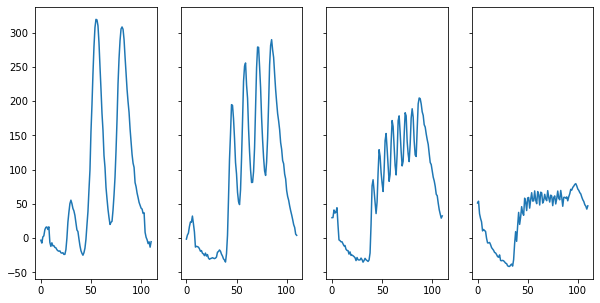

In [400]:
#plotting Mi1 data
f,ax = plt.subplots(1,4,figsize=(10,5),sharey=True)
ax[0].plot(T4_gcamp[:,0]); ax[1].plot(T4_gcamp[:,1]); ax[2].plot(T4_gcamp[:,2]);ax[3].plot(T4_gcamp[:,3]);

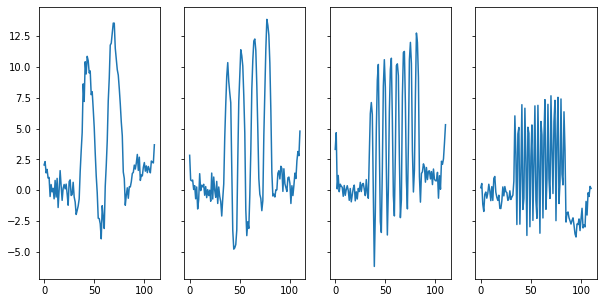

In [250]:
#plotting Mi1 data
f,ax = plt.subplots(1,4,figsize=(10,5),sharey=True)
ax[0].plot(T4_arclight[:,0]); ax[1].plot(T4_arclight[:,1]); ax[2].plot(T4_arclight[:,2]);ax[3].plot(T4_arclight[:,3]);

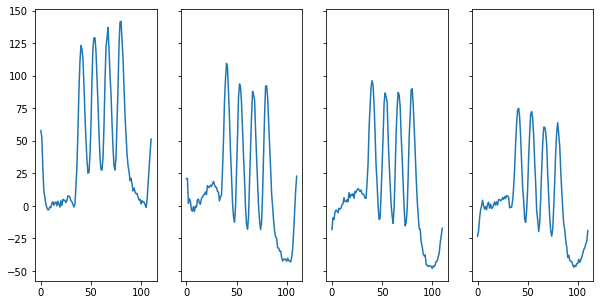

In [251]:
#plotting Mi1 data
f,ax = plt.subplots(1,4,figsize=(10,5),sharey=True)
ax[0].plot(T4_gcamp[:,4]); ax[1].plot(T4_gcamp[:,5]); ax[2].plot(T4_gcamp[:,6]);ax[3].plot(T4_gcamp[:,7]);

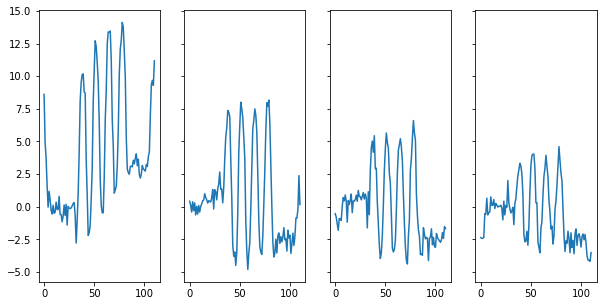

In [252]:
#plotting Mi1 data
f,ax = plt.subplots(1,4,figsize=(10,5),sharey=True)
ax[0].plot(T4_arclight[:,4]); ax[1].plot(T4_arclight[:,5]); ax[2].plot(T4_arclight[:,6]);ax[3].plot(T4_arclight[:,7]);

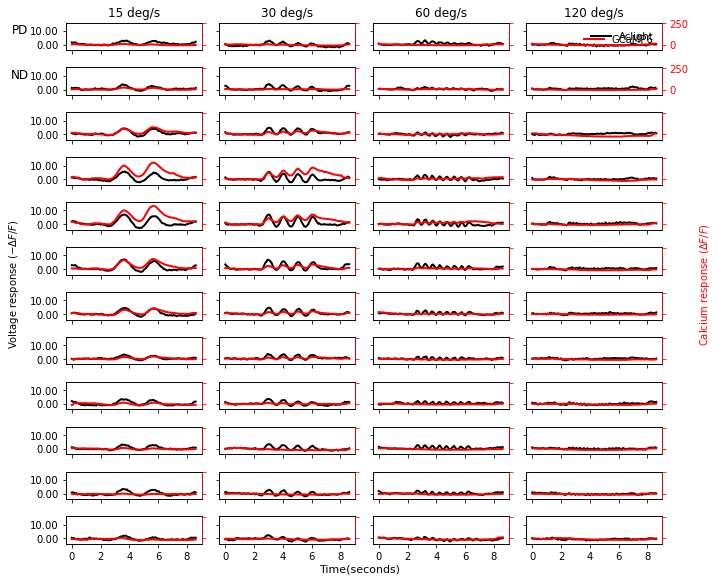

In [452]:
velocity = [15, 30, 60, 120]
#utils.plot_data_twinaxis([T4_arclight[10:,0:8], T4_gcamp[10:,0:8]], ylim=(-0.20,2.50), savefig=True, title='Gratings_SpeedPDND');
#utils.plot_data_twinaxis([T4_arclight, T4_gcamp], fig_size=(15,15),speed=velocity,ylim1=(-0.04,0.10),ylim2=(-0.30,2.60),savefig=False, title='Ori_Vel');
utils.plot_data_twinaxis([T4_arclight[:,0:48], T4_gcamp[:,0:48]], legend=['Aclight','GCaMP6'],fig_size=(10,8),speed=velocity,ylim1=(-4,10),ylim2=(-30,260),savefig=False, title='Ori_Vel');

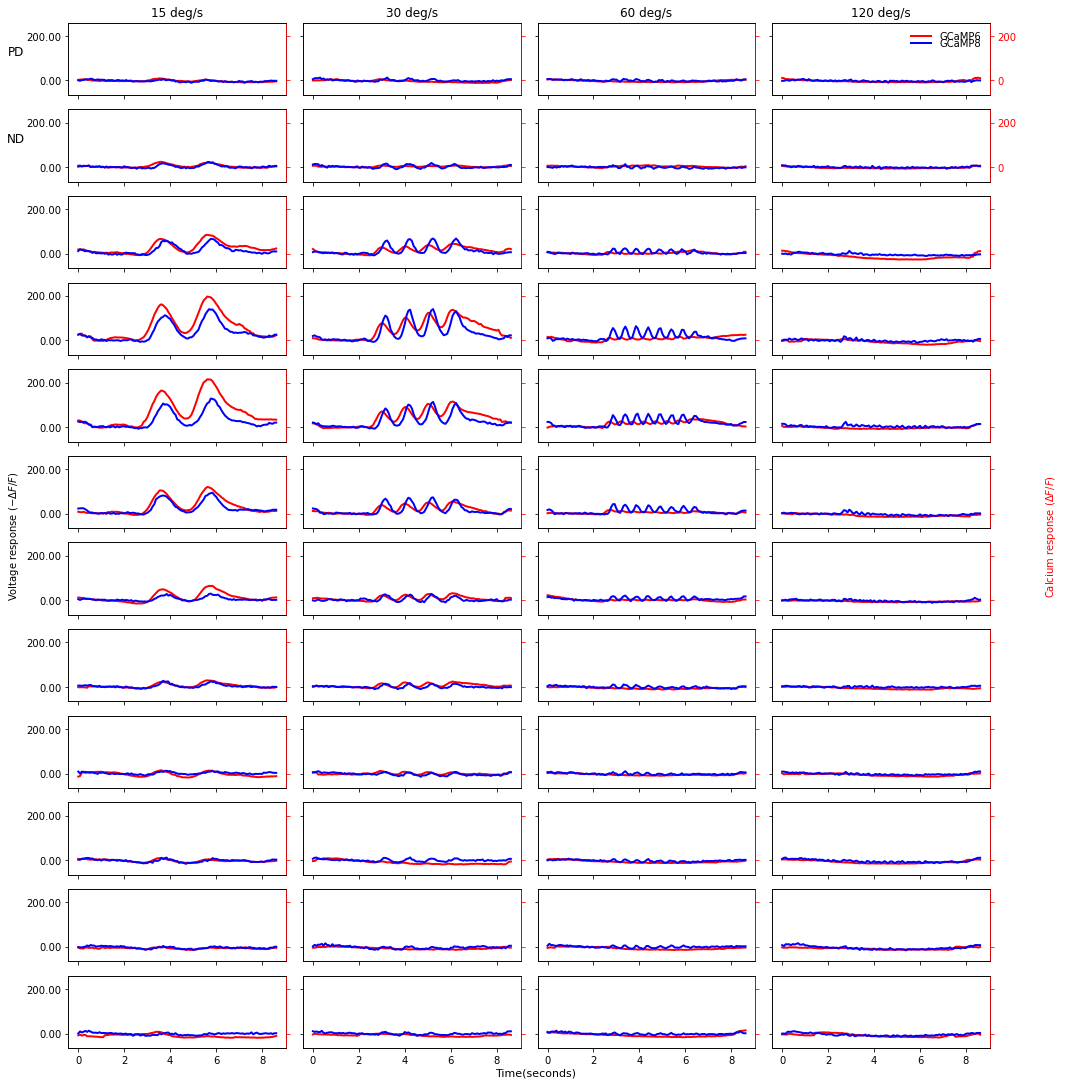

In [12]:
velocity = [15, 30, 60, 120]
#utils.plot_data_twinaxis([T4_arclight[10:,0:8], T4_gcamp[10:,0:8]], ylim=(-0.20,2.50), savefig=True, title='Gratings_SpeedPDND');
#utils.plot_data_twinaxis([T4_arclight, T4_gcamp], fig_size=(15,15),speed=velocity,ylim1=(-0.04,0.10),ylim2=(-0.30,2.60),savefig=False, title='Ori_Vel');
utils.plot_data_twinaxis([T4_gcamp6[:,0:48], T4_gcamp8[:,0:48]], legend=['GCaMP6','GCaMP8'],c=['r','b'],fig_size=(15,15),speed=velocity,ylim1=(-30,260),ylim2=(-30,260),savefig=False, title='Ori_Vel');

/Volumes/Elements/Project_T4_VoltageCalcium/Modelling/Computational_Modelling/Orientation_Velocity&Contrast_Model/NewModel/utils.py:167: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


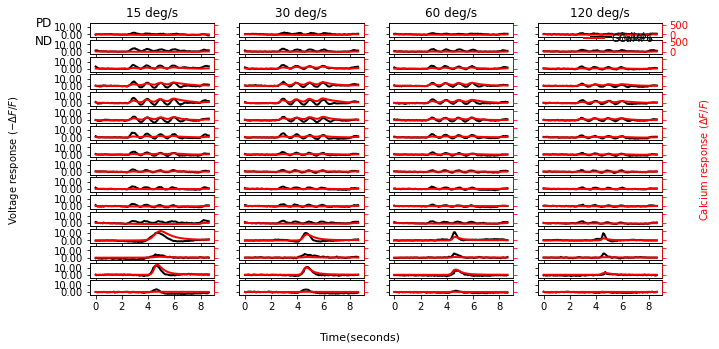

In [7]:
velocity=[15,30,60,120]
utils.plot_data_twinaxis([T4_arclight[:,48:], T4_gcamp[:,48:]],speed=velocity,legend=['Aclight','GCaMP6'],c=['k','r'],ylim1=(-4,10),ylim2=(-20,600))

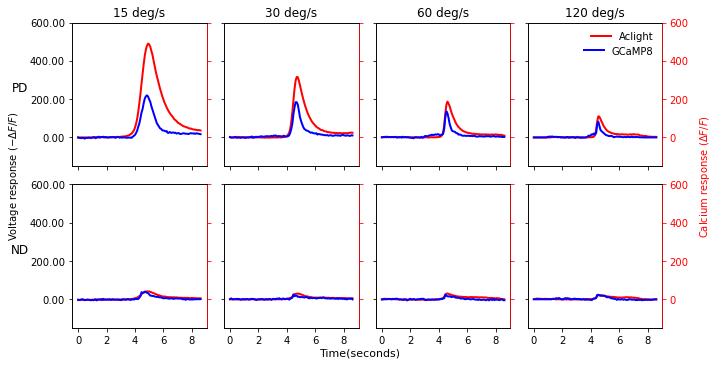

In [13]:
velocity=[15,30,60,120]
utils.plot_data_twinaxis([T4_gcamp6[:,48:], T4_gcamp8[:,48:]],speed=velocity,legend=['Aclight','GCaMP8'],c=['r','b'],ylim1=(-20,600),ylim2=(-20,600))

In [345]:
T4_arclight.min(), T4_arclight.max()

(-2.4393105728519986, 6.329843927286636)

In [499]:
global p_bounds 

#bounds on parameters (tauhp, thres, taulp1, taulp2, gain, shift)
#p_bounds = ((0,1000),(T4_arclight.min()*100, T4_arclight.max()*100),(0,300),(0,2000),(0,1000),(-5,0))

#bounds on parameters for simple model (tauhp, thres, taulp, gain, shift)
#p_bounds_S = ((0,1000),(T4_arclight.min()*100, T4_arclight.max()*100),(0,2000),(0,1000),(-5,0))

#bounds on parameters for L model (tauhp, thres, taulp1, taulp2, gain1, gain2 shift)
p_bounds_L = ((0,1000),(T4_arclight.min()*100, T4_arclight.max()*100),(0,300),(0,2000),(0,1000),(0,1000),(-5,0))

p_bounds = p_bounds_L #for L model
#p_bounds = p_bounds_S #for simple model

In [500]:
def S_model(x, p, dt=(1/13.0), plot=False):
    (tauhp, thres, taulp, gain, shift) = p
    x_highpass = highpass(x.copy(), tauhp/100.0, dt)
    x_thres = threshold_cut(x_highpass.copy(), thres/100.0)
    x_thres_lp = lowpass(x_thres.copy(), taulp/100.0, dt)
    x_2 = x_thres_lp * gain
    y = np.roll(x_2, int(shift), axis=0)
    return y

def M_model(x, p, dt=(1/13.0), plot=False):
    """x is Arclight data. p is list of parameters. dt is timestep"""
    (tauhp, thres, taulp1, taulp2, gain, shift) = p
    x_highpass = highpass(x.copy(), tauhp/100.0, dt)
    x_thres = threshold_cut(x_highpass.copy(), thres/100.0)
    x_thres_lp1 = lowpass(x_thres.copy(), taulp1/100.0, dt)
    x_thres_lp2 = lowpass(x_thres.copy(), taulp2/100.0, dt)
    x_1 = x_thres_lp1 * x_thres_lp2
    x_2 = x_1 * gain
    y = np.roll(x_2, int(shift), axis=0)
    if plot==True:
        utils.plot_data([x, x_thres, x_1, x_2, y], c=['k','grey','g','brown','r']);
    return y

def L_model(x, p, dt=(1/13.0), plot=False):
    """x is Arclight data. p is list of parameters. dt is timestep"""
    (tauhp, thres, taulp1, taulp2, gain1, gain2, shift) = p
    x_highpass = highpass(x.copy(), tauhp/100.0, dt)
    x_thres = threshold_cut(x_highpass.copy(), thres/100.0)
    x_thres_lp1 = lowpass(x_thres.copy(), taulp1/100.0, dt)*gain1
    x_thres_lp2 = lowpass(x_thres.copy(), taulp2/100.0, dt)*gain2
    x_1 = x_thres_lp1 + x_thres_lp2
    y = np.roll(x_1, int(shift), axis=0)
    if plot==True:
        utils.plot_data([x, x_thres, x_1, x_2, y], c=['k','grey','g','brown','r']);
    return y

In [501]:
def lowpass(x, tau, dt):
    y = np.zeros_like(x)
    n = x.shape[0]   #length of time dimension
    alpha = dt / (tau+dt)
    y[0] = x[0]
    for i in np.arange(1,n):
        y[i] = alpha*x[i] + (1-alpha)*y[i-1]
    return y

def highpass(x, tau, dt):
    y = x - lowpass(x, tau, dt)
    return y

def bandpass(x, tauhp, taulp, dt):
    y = highpass(x, tauhp, dt)
    y = lowpass(y, taulp, dt)
    return y

def threshold_cut(x, thres):
    x_copy = x.copy()
    x_copy[x_copy<thres] = thres
    return x_copy 

def create_random_params():
    p = [np.random.uniform(bounds[0], bounds[1]) for bounds in p_bounds]
    #print(p)
    return p  

def calc_error(p):
    #T4Ca_model = M_model(T4_arclight, p)
    T4Ca_model = L_model(T4_arclight, p)
    #T4Ca_model = S_model(T4_arclight, p)
    
    #error = np.mean(np.sqrt(np.mean((T4_gcamp-T4Ca_model)**2,axis=0)))
    #error = (T4_gcamp[10:100,:]-T4Ca_model[10:100,:])**2
    #error = np.mean(np.sqrt(np.mean((T4_gcamp[10:100,:]-T4Ca_model[10:100,:])**2,axis=0)))/np.mean(np.sqrt(np.mean(T4_gcamp[10:100,:]**2,axis=0)))
    error = np.sum((T4_gcamp[10:100,:]-T4Ca_model[10:100,:])**2)
    return error

def fit_params():
    p = create_random_params() #creates random parameter values
    #options = {'maxiter':5000} #maximum number of iterations
    res = minimize(calc_error, p, bounds=p_bounds)#options=options
    success = res.success
    if success:
        print('Optimisation successful')
    else:
        print('Optimisation not succesfull')
    p = res.x
    error = calc_error(p)
    print('Remaining Error: ', format(calc_error(p),".2f"))
    print(res)
    return p, error, success

In [502]:
def many_runs(n):
    (p_list, err_list) = ([],[]) 
    for i in range(n):
        print('run : '+str(i))
        (par, err, success) = fit_params()
        if success:
            print(par)
            p_list.append(par)
            err_list.append(err)
    return p_list, err_list
    

In [503]:
para_list, err_list = many_runs(300)

run : 0
Optimisation successful
Remaining Error:  19281840.25
      fun: 19281840.247623432
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, 0.000, 0.000, -0.373, -0.373, -0.000])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 80
      nit: 4
     njev: 10
   status: 0
  success: True
        x: array([0.629, 1258.775, 299.932, 1999.200, 0.481, 0.649, -2.408])
[0.629 1258.775 299.932 1999.200 0.481 0.649 -2.408]
run : 1
Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, 0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 0.000, 2000.000, 0.000, 0.000, -3.739])
[0.000 -346.258 0.000 2000.000 0.000 0.000 -3.739]
run : 2
Optimisation successful
Remaining E

Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, 0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 0.000, 0.000, 0.000, -0.889])
[0.000 -346.258 300.000 0.000 0.000 0.000 -0.889]
run : 19
Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 71.975, 1294.898, 0.000, 0.000, -2.156])
[0.000 -346.258 71.975 1294.898 0.000 0.000 -2.156]
run : 20
Optimisation successful
Remaining Error:  21320

Optimisation successful
Remaining Error:  19281840.25
      fun: 19281840.24762354
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, 0.000, 0.000, -0.745, -0.745, -0.000])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 240
      nit: 7
     njev: 30
   status: 0
  success: True
        x: array([6.874, 891.846, 298.365, 1988.501, 0.477, 1.118, -4.162])
[6.874 891.846 298.365 1988.501 0.477 1.118 -4.162]
run : 37
Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -0.681])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -0.681]
run : 38
Optimisation successful
Remaining Erro

Optimisation successful
Remaining Error:  7190835.12
      fun: 7190835.117521394
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.235, 1.118, -0.373, -4.284, -0.559, 0.373, -0.000])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 824
      nit: 69
     njev: 103
   status: 0
  success: True
        x: array([29.084, -67.136, 127.902, 1985.156, 84.097, 719.555, -2.102])
[29.084 -67.136 127.902 1985.156 84.097 719.555 -2.102]
run : 55
Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -3.184])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -3.184]
run : 56
Optimisation successful
Rem

Optimisation successful
Remaining Error:  7190774.47
      fun: 7190774.465769771
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.774, -1.024, 0.466, -4.098, -0.373, 0.186, -0.000])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 872
      nit: 76
     njev: 109
   status: 0
  success: True
        x: array([29.087, -67.131, 128.038, 2000.000, 84.268, 723.456, -2.371])
[29.087 -67.131 128.038 2000.000 84.268 723.456 -2.371]
run : 72
Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -3.196])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -3.196]
run : 73
Optimisation successful
Rema

Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -2.262])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -2.262]
run : 93
Optimisation successful
Remaining Error:  7363451.41
      fun: 7363451.411115042
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.838, -2.887, -0.838, -4.377, 0.559, -0.093, -0.000])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1272
      nit: 108
     njev: 159
   status: 0
  success: True
        x: array([35.257, -67.372, 151.057, 2000.000, 79.592, 643.050, -3.839])
[35.257 -67.372 151.057 2000.000 79.592 643.050 -3.839]
run : 94
Optimisation successful


Optimisation successful
Remaining Error:  7377688.26
      fun: 7377688.264971254
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([-95.367, 63.703, -1.397, -31.013, -3.446, -2.608, -0.000])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 688
      nit: 48
     njev: 86
   status: 0
  success: True
        x: array([34.106, -68.696, 142.451, 795.921, 57.019, 357.229, -3.027])
[34.106 -68.696 142.451 795.921 57.019 357.229 -3.027]
run : 112
Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -3.208])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -3.208]
run : 113
Optimisation successful


Optimisation successful
Remaining Error:  8001089.56
      fun: 8001089.561759916
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.186, 1.211, 0.466, 1.583, -1.118, -0.093, -0.000])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 544
      nit: 47
     njev: 68
   status: 0
  success: True
        x: array([341.992, -29.306, 53.019, 1997.592, 32.073, 210.099, -3.392])
[341.992 -29.306 53.019 1997.592 32.073 210.099 -3.392]
run : 131
Optimisation successful
Remaining Error:  7615570.72
      fun: 7615570.721125956
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([-145.286, -39.581, -323.727, 15540.607, -0.186, -4.936, -0.000])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1936
      nit: 139
     njev: 242
   status: 0
  success: True
        x: array([23.454, -63.501, 300.000, 0.000, 292.052, 10.194, -0.776])
[23.454 -63.501 300.000 0.000 292.052 10.194 -0.776]
run : 132
Optimisation 

Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -0.190])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -0.190]
run : 152
Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 209.413, 1433.314, 0.000, 0.000, -2.401])
[0.000 -346.258 209.413 1433.314 0.000 0.000 -2.401]
run : 153
Optimisation successful
Remaining Er

Optimisation successful
Remaining Error:  19281840.25
      fun: 19281840.24762356
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, 0.000, 0.000, -0.745, -0.745, -0.000])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 64
      nit: 3
     njev: 8
   status: 0
  success: True
        x: array([0.173, 1258.747, 299.959, 1998.228, 0.620, 0.510, -4.355])
[0.173 1258.747 299.959 1998.228 0.620 0.510 -4.355]
run : 173
Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -2.241])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -2.241]
run : 174
Optimisation successful
Remaining Er

Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -4.061])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -4.061]
run : 191
Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -3.125])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -3.125]
run : 192
Optimisation successful
Remaining 

Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -1.772])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -1.772]
run : 211
Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -2.350])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -2.350]
run : 212
Optimisation successful
Remaining 

Optimisation successful
Remaining Error:  19281840.25
      fun: 19281840.24900105
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, 0.000, 0.000, 64.448, 64.448, -0.000])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 176
      nit: 7
     njev: 22
   status: 0
  success: True
        x: array([1.529, 867.326, 299.897, 1999.619, 0.328, 1.311, -1.507])
[1.529 867.326 299.897 1999.619 0.328 1.311 -1.507]
run : 231
Optimisation successful
Remaining Error:  19281840.25
      fun: 19281840.247623444
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, -0.373, 0.745, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 40
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.000, 1260.476, 300.000, 2000.000, 0.442, 0.687, -4.946])
[0.000 1260.476 300.000 2000.000 0.442 0.687 -4.946]
run : 232
Optimisation successful
Remaining Err

Optimisation successful
Remaining Error:  19281840.25
      fun: 19281840.24762342
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.373, 0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 72
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([0.189, 1259.312, 299.959, 1999.893, 0.461, 0.668, -0.646])
[0.189 1259.312 299.959 1999.893 0.461 0.668 -0.646]
run : 250
Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -3.188])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -3.188]
run : 251
Optimisation successful
Remaining Err

Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -4.893])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -4.893]
run : 270
Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -0.283])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -0.283]
run : 271
Optimisation successful
Remaining Error:  21320568.41
    

Optimisation successful
Remaining Error:  19281840.25
      fun: 19281840.247623425
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.373, 0.373, 0.373, -0.000])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 40
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.000, 1260.476, 300.000, 2000.000, 0.553, 0.575, -2.864])
[0.000 1260.476 300.000 2000.000 0.553 0.575 -2.864]
run : 292
Optimisation successful
Remaining Error:  21320568.41
      fun: 21320568.405315343
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.000, 0.000, -0.000, -0.000, 0.000, 0.000, -0.000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.000, -346.258, 300.000, 2000.000, 0.000, 0.000, -0.958])
[0.000 -346.258 300.000 2000.000 0.000 0.000 -0.958]
run : 293
Optimisation successful
Remaining E

In [225]:
# model_para = np.load('model_parameters/scipymini_newmodel_alldatasetcombined.npy')
# print(f'(tauhp, thres, taulp1, taulp2, gain, shift) = ({model_para[0]/100:.2f}, {model_para[1]/100:.2f},{model_para[2]/100:.2f}, {model_para[3]/100:.2f}, {model_para[4]:.2f}, {model_para[5]:.2f})')

In [504]:
model_para = para_list[np.argmin(err_list)]
print(np.min(err_list))
print(np.min(err_list) / np.sum((T4_gcamp[10:100,:])**2))
#print(f'(thres, taulp1, gain1, taulp2, gain2, tshift) = ({model_para[0]/100:.2f}, {model_para[1]/100:.2f},{model_para[2]:.2f}, {model_para[3]/100:.2f}, {model_para[4]:.2f}, {model_para[5]:.2f})')
#print(f'(thres, tauhp, taulp1, gain1, taulp2, gain2, tshift) = ({model_para[0]/100:.2f}, {model_para[1]/100:.2f},{model_para[2]/100:.2f}, {model_para[3]:.2f}, {model_para[4]/100:.2f}, {model_para[5]:.2f}, {model_para[6]:.2f})')
#print(f'(tauhp, thres, taulp1, taulp2, gain, shift) = ({model_para[0]/100:.2f}, {model_para[1]/100:.2f},{model_para[2]/100:.2f}, {model_para[3]/100:.2f}, {model_para[4]:.2f}, {model_para[5]:.2f})')
#print(f'(tauhp, thres, taulp1, taulp2, gain1, gain2, shift) = ({model_para[0]/100:.2f}, {model_para[1]/100:.2f},{model_para[2]/100:.2f}, {model_para[3]/100:.2f}, {model_para[4]:.2f}, {model_para[5]:.2f}, {model_para[6]:.2f})')
print(f'(tauhp, thres, taulp, gain, shift) = ({model_para[0]/100:.2f}, {model_para[1]/100:.2f},{model_para[2]/100:.2f}, {model_para[3]:.2f}, {model_para[4]:.2f})')


#print(model_para/100) # (thres, taulp1, gain1, taulp2, gain2, tshift)

7190774.452967832
0.3372693596281011
(tauhp, thres, taulp, gain, shift) = (0.29, -0.67,1.28, 2000.00, 84.30)


In [506]:
#model_p = fit_params()
#T4Ca_model = M_model(T4_arclight, model_para, plot=False)
T4Ca_model = L_model(T4_arclight, model_para, plot=False)
#T4Ca_model = S_model(T4_arclight, model_para, plot=False)
#plot_data([T4_Gcamp, T4Ca_model])

In [507]:
np.sum((T4_gcamp[10:100,:]-T4Ca_model[10:100,:])**2) / np.sum((T4_gcamp[10:100,:])**2)

0.3372693596281011

In [493]:
# T4_gcamp = T4_gcamp / 100.0
# T4Ca_model = T4Ca_model / 100.0

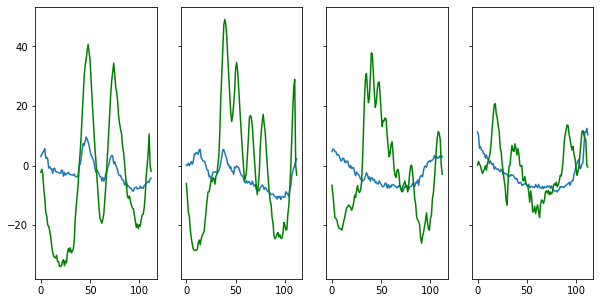

In [508]:
#plotting Mi1 data
f,ax = plt.subplots(1,4,figsize=(10,5),sharey=True)
ax[0].plot(T4_gcamp[:,0]); ax[1].plot(T4_gcamp[:,1]); ax[2].plot(T4_gcamp[:,2]);ax[3].plot(T4_gcamp[:,3]);
ax[0].plot(T4Ca_model[:,0],color='g'); ax[1].plot(T4Ca_model[:,1],color='g'); ax[2].plot(T4Ca_model[:,2],color='g');ax[3].plot(T4Ca_model[:,3],color='g');

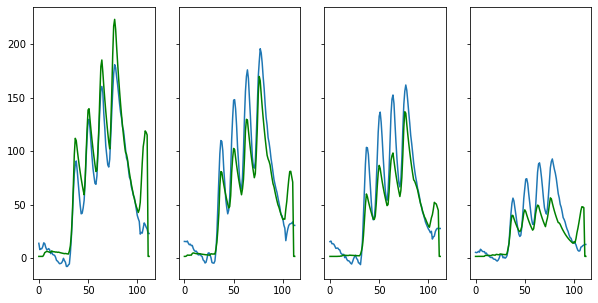

In [448]:
#plotting Mi1 data
f,ax = plt.subplots(1,4,figsize=(10,5),sharey=True)
ax[0].plot(T4_gcamp[:,4]); ax[1].plot(T4_gcamp[:,5]); ax[2].plot(T4_gcamp[:,6]);ax[3].plot(T4_gcamp[:,7]);
ax[0].plot(T4Ca_model[:,4],color='g'); ax[1].plot(T4Ca_model[:,5],color='g'); ax[2].plot(T4Ca_model[:,6],color='g');ax[3].plot(T4Ca_model[:,7],color='g');

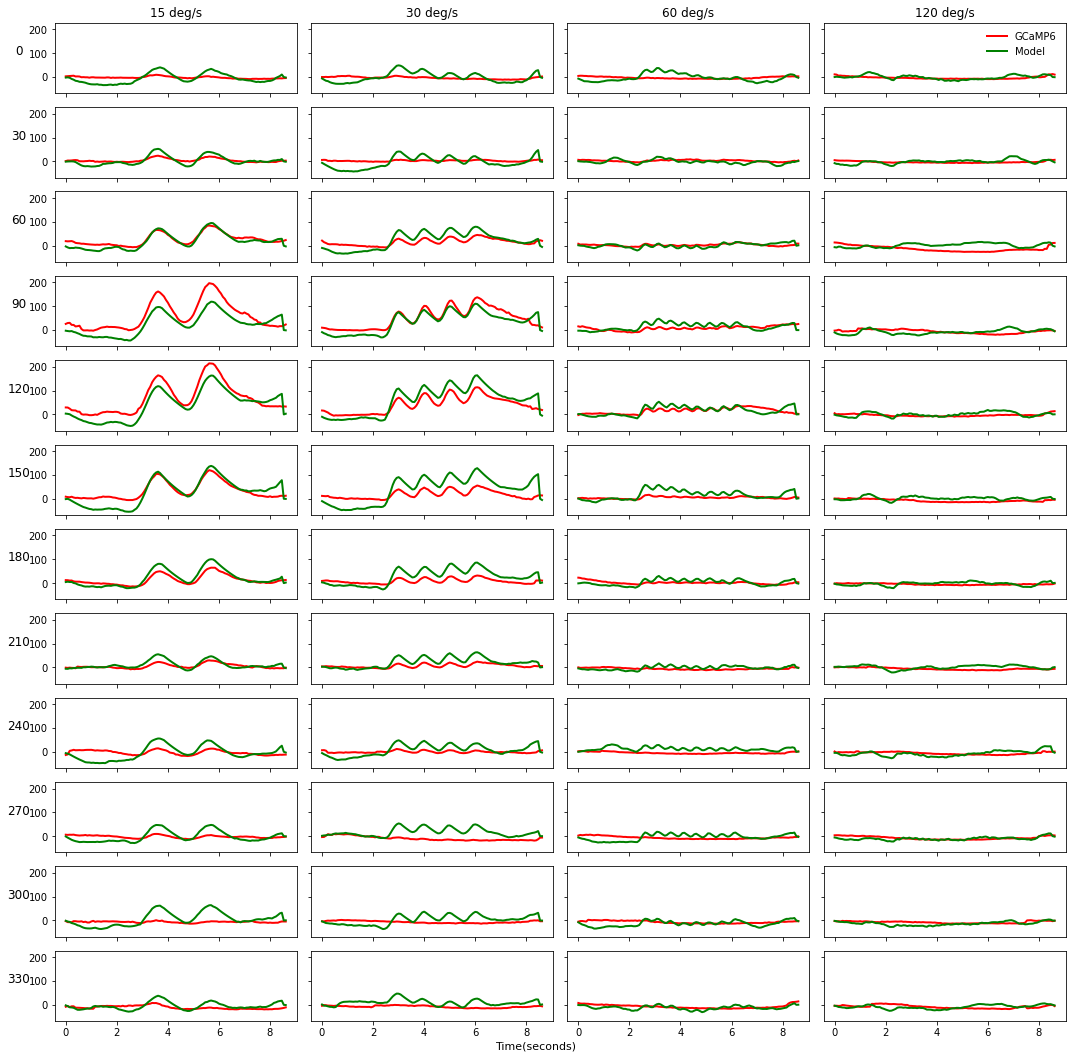

In [509]:
velocity = [15, 30, 60, 120]
utils.plot_data([T4_gcamp[:,0:48], T4Ca_model[:,0:48]], ori=True,label=['GCaMP6','Model'],c=['r','g'],fig_size=(15,15),speed=velocity,savefig=False, title='Ori_Vel');
#utils.plot_data_twinaxis([T4_gcamp[0:107,0:48], T4Ca_model[0:107,0:48]],speed=velocity,c=['r','g'])
#plt.savefig('figures/scipymini_wholedatasetfit/Ori_Velocity_model.pdf',dpi=1000)

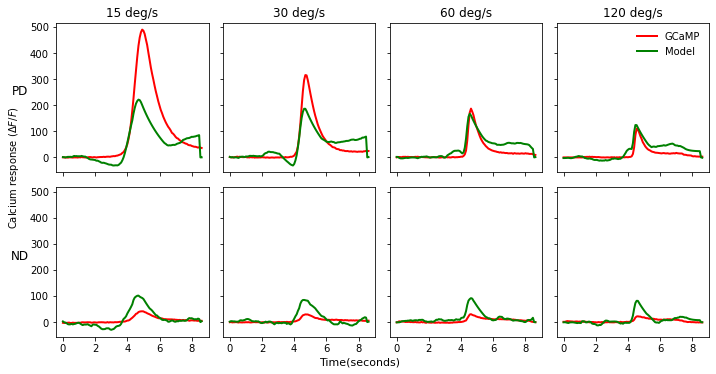

In [510]:
velocity=[15,30,60,120]
#utils.plot_data([T4_gcamp[:,48:], T4Ca_model[:,48:]], label=['GCaMP','Model'],c=['r','g'],speed=velocity)
utils.plot_data([T4_gcamp[:,96:104], T4Ca_model[:,96:104]], label=['GCaMP','Model'],c=['r','g'],speed=velocity)
#plt.savefig('figures/scipymini_wholedatasetfit/EdgePDND_model.pdf',dpi=1000)

In [20]:
# err_list = a['err']
# para_list = a['para']

NameError: name 'a' is not defined

In [465]:
err_array = np.array(err_list) / np.sum((T4_gcamp[10:100,:])**2)

In [466]:
idx = np.argpartition(err_list, 10)

In [467]:
err_array[idx[:10]]

array([0.210, 0.207, 0.210, 0.210, 0.207, 0.210, 0.207, 0.207, 0.210,
       0.210])

In [468]:
from scipy.stats import sem
np.mean(err_array[idx[:10]]), np.std(err_array[idx[:10]]), sem(err_array[idx[:10]])

(0.20878611603175407, 0.0016557773633292334, 0.0005519257877764111)

In [469]:
para_array = np.array(para_list)
para_array[:,:4] = para_array[:,:4]/100.0
#para_array[:,:3] = para_array[:,:3]/100.0

In [470]:
#np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
para_array[idx[:10]]

array([[0.435, -0.382, 2.856, 2.857, 393.033, -3.708],
       [0.363, -0.346, 2.368, 2.367, 359.946, -2.832],
       [0.435, -0.382, 2.857, 2.856, 393.037, -3.150],
       [0.435, -0.382, 2.856, 2.857, 393.005, -3.593],
       [0.363, -0.346, 2.368, 2.367, 359.949, -2.234],
       [0.435, -0.382, 2.858, 2.856, 393.061, -3.739],
       [0.363, -0.346, 2.367, 2.368, 359.943, -2.225],
       [0.365, -0.348, 2.376, 2.375, 360.417, -2.057],
       [0.435, -0.383, 2.857, 2.857, 393.079, -3.062],
       [0.435, -0.382, 2.845, 2.868, 392.998, -3.241]])

In [471]:
para_array[idx[:10],:5].shape

(10, 5)

In [472]:
np.std(para_array[idx[:10],:5],axis=0)

array([0.035, 0.018, 0.238, 0.240, 16.153])

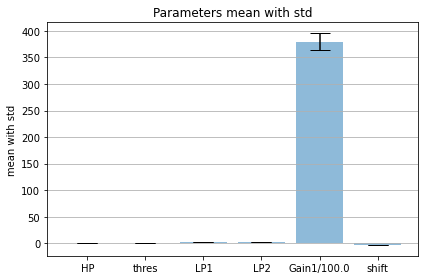

In [473]:
f, ax = plt.subplots()
#labels = ['HP', 'thres', 'LP', 'Gain1/100.0','shift']
labels = ['HP', 'thres', 'LP1', 'LP2', 'Gain1/100.0','shift']
#labels = ['HP', 'thres', 'LP1', 'LP2', 'Gain1/100.0','Gain2/100.0','shift']
x_pos = np.arange(len(labels))
mean = np.mean(para_array[idx[:10],:],axis=0)
std = np.std(para_array[idx[:10],:],axis=0)
standard_error_mean = sem(para_array[idx[:10],:],axis=0)
ax.bar(x_pos, mean,
       yerr=std,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10);
ax.set_ylabel('mean with std')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Parameters mean with std')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [474]:
mean

array([0.406, -0.368, 2.661, 2.663, 379.847, -2.984])

In [475]:
std

array([0.035, 0.018, 0.238, 0.240, 16.153, 0.599])

In [243]:
standard_error_mean

array([0.000, 0.000, 0.000, 0.000, 0.001, 0.091])

In [88]:
std/np.sqrt(9)

array([0.000, 0.000, 0.000, 0.000, 0.071])

In [90]:
para_array[idx[:10]]

array([[0.998, -0.009, 0.664, 64.326, -0.857],
       [0.999, -0.009, 0.664, 64.320, -0.584],
       [0.998, -0.009, 0.664, 64.326, -0.101],
       [0.999, -0.009, 0.664, 64.319, -0.138],
       [0.998, -0.009, 0.664, 64.323, -0.835],
       [0.998, -0.009, 0.664, 64.323, -0.539],
       [0.998, -0.009, 0.664, 64.326, -0.553],
       [0.844, -0.010, 0.736, 69.312, -0.822],
       [0.844, -0.010, 0.736, 69.310, -0.586],
       [0.844, -0.010, 0.736, 69.312, -0.068]])

In [91]:
np.savez('model_parameters/err_para_list/Smodel_Tm3dataset.npz',err=err_list,para = para_list)

In [39]:
a = np.load('model_parameters/err_para_list/gcamp6_alldata.npz')

In [92]:
save_modeldata = True
if save_modeldata:
    np.save('/Volumes/Elements/Project_T4_VoltageCalcium/PaperFigures/data/modeldata/Tm3Ca_Smodel.npy',T4Ca_model)

In [93]:
save_para = True
if save_para:
    np.save('model_parameters/Smodel_Tm3dataset.npy',model_para)

In [26]:
a['err'].shape,a['para'].shape

((300,), (300, 6))

In [69]:
a['err']

array([7952503.553, 1376590.076, 7952503.553, 1138915.179, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 1181497.695, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 7553643.315,
       7952503.553, 1175718.475, 7952503.553, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 1191335.419, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 1221463.892,
       7952503.553, 7952503.553, 7553643.315, 1376590.071, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 1376590.075,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 79525

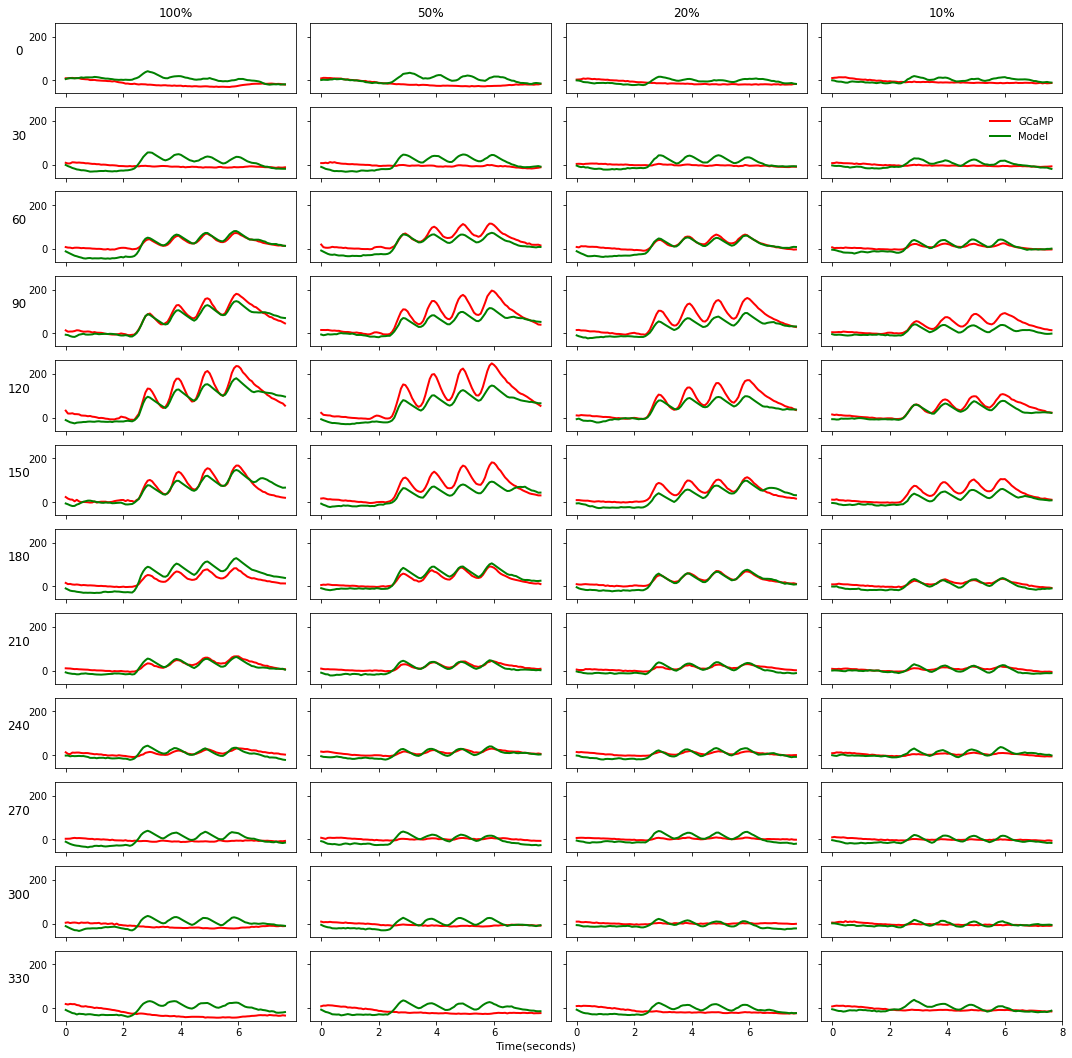

In [17]:
contrast = [100, 50, 20, 10]
#utils.plot_data_twinaxis([T4_arclight[10:,0:8], T4_gcamp[10:,0:8]], ylim=(-0.20,2.50), savefig=True, title='Gratings_SpeedPDND');
#utils.plot_data_twinaxis([T4_arclight, T4_gcamp], fig_size=(15,15),speed=velocity,ylim1=(-0.04,0.10),ylim2=(-0.30,2.60),savefig=False, title='Ori_Vel');
utils.plot_data([T4_gcamp[:100,48:96], T4Ca_model[:100,48:96]], ori=True,contrast=True,label=['GCaMP','Model'],c=['r','g'], fig_size=(15,15),speed=contrast,savefig=False, title='Ori_Vel');
#plt.savefig('figures/scipymini_wholedatasetfit/Ori_Contrast_model.pdf',dpi=1000)

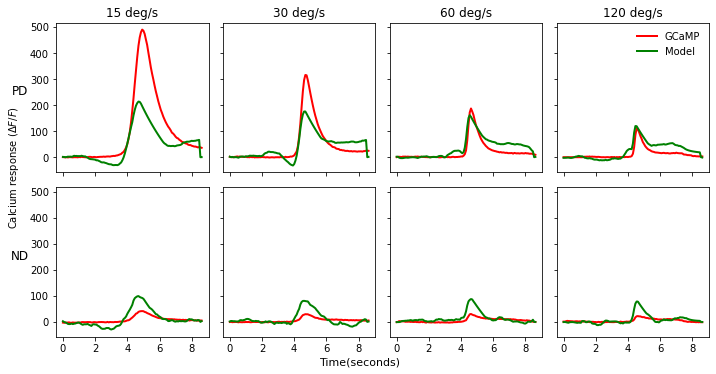

In [18]:
velocity=[15,30,60,120]
utils.plot_data([T4_gcamp[:,96:104], T4Ca_model[:,96:104]], label=['GCaMP','Model'],c=['r','g'],speed=velocity)
#plt.savefig('figures/scipymini_wholedatasetfit/EdgePDND_model.pdf',dpi=1000)

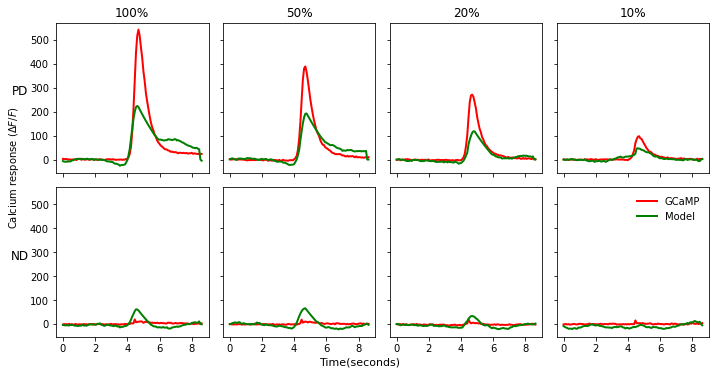

In [19]:
contrast = [100, 50, 20, 10]
utils.plot_data([T4_gcamp[:,104:112], T4Ca_model[:,104:112]], label=['GCaMP','Model'],speed=contrast,contrast=True,c=['r','g'])

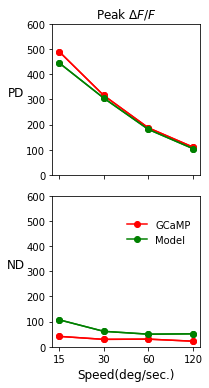

In [16]:
data_list = [T4_gcamp[:,96:104], T4Ca_model[:,96:104]]
velocity = [15, 30, 60, 120]
utils.plot_modelpeaktuning(data_list, speed=velocity, ylim1=(0,600),ylim2=(0.0,600.0),color=['r','g'],title='',savefig=False)
#plt.savefig('figures/scipymini_wholedatasetfit/EdgePDND_peaktuning.pdf',dpi=1000)

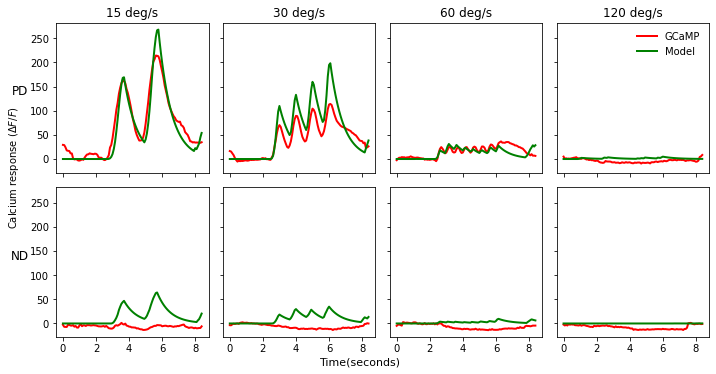

In [17]:
velocity=[15,30,60,120]
utils.plot_data([T4_gcamp[:110,[16,17,18,19,40,41,42,43]], T4Ca_model[:110,[16,17,18,19,40,41,42,43]]], label=['GCaMP','Model'],c=['r','g'],speed=velocity)
#plt.savefig('figures/scipymini_wholedatasetfit/GratingsPDND_model.pdf',dpi=1000)

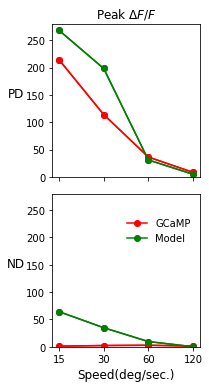

In [56]:
data_list = [T4_gcamp[:110,[16,17,18,19,40,41,42,43]], T4Ca_model[:110,[16,17,18,19,40,41,42,43]]]
velocity = [15, 30, 60, 120]
utils.plot_modelpeaktuning(data_list, speed=velocity, ylim1=(0,280),ylim2=(0.0,280),color=['r','g'],title='',savefig=False)
#plt.savefig('figures/scipymini_wholedatasetfit/GratingsPDND_peaktuning.pdf',dpi=1000)

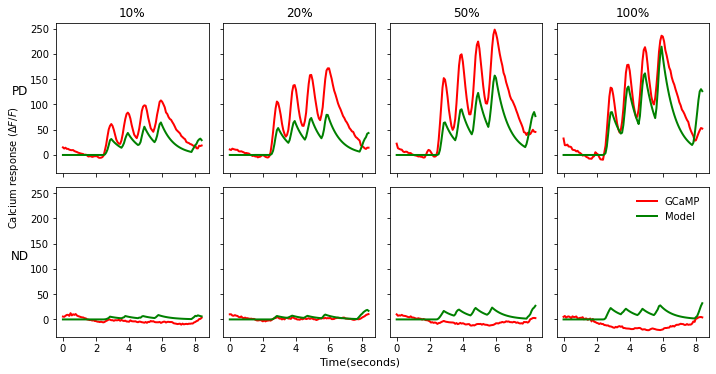

In [57]:
contrast=[10,20,50,100]
utils.plot_data([T4_gcamp[:110,[67,66,65,64,91,90,89,88]], T4Ca_model[:110,[67,66,65,64,91,90,89,88]]], label=['GCaMP','Model'],c=['r','g'],speed=contrast,contrast=True)
#plt.savefig('figures/scipymini_wholedatasetfit/ContrastPDND_model.pdf',dpi=1000)

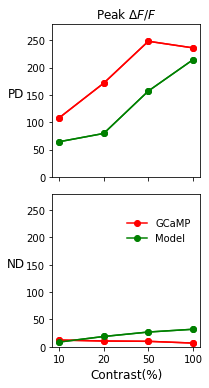

In [58]:
data_list = [T4_gcamp[:110,[67,66,65,64,91,90,89,88]], T4Ca_model[:110,[67,66,65,64,91,90,89,88]]]
contrast = [10,20,50,100]
utils.plot_modelpeaktuning(data_list, speed=contrast, contrast=True,ylim1=(0,280),ylim2=(0.0,280),color=['r','g'],title='',savefig=False)
#plt.savefig('figures/scipymini_wholedatasetfit/ContrastPDND_peaktuning.pdf',dpi=1000)

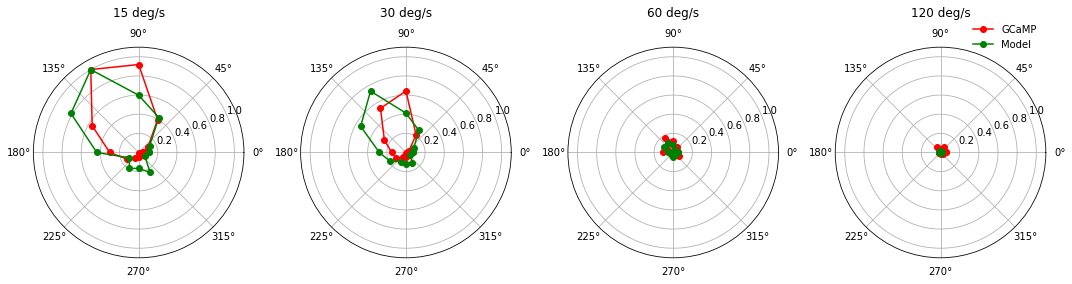

In [27]:
data_list = [T4_gcamp[:,0:48], T4Ca_model[:105,0:48]]
velocity = [15, 30, 60, 120]
peak_tuning = utils.calc_peaktuning(data_list, speed=velocity)
utils.plot_oripeaktuning(data_list,speed=velocity, label=['GCaMP','Model'],fig_size=(15,4), ylim1=(0.0,1.1),ylim2=(0.0,1.1),color=['r','g'],title='Speed_Ori_Tuning');
#plt.savefig('figures/scipymini_wholedatasetfit/OriVelPolar_model.pdf',dpi=1000)

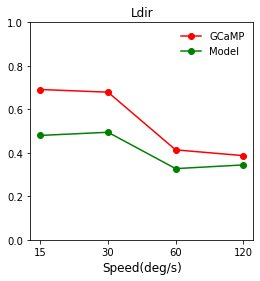

In [28]:
utils.plot_Ldir_mag(peak_tuning, title='Ldir_Speed_Ori_Tuning',savefig=False);
#plt.savefig('figures/scipymini_wholedatasetfit/OriVelLdir_model.pdf',dpi=1000)

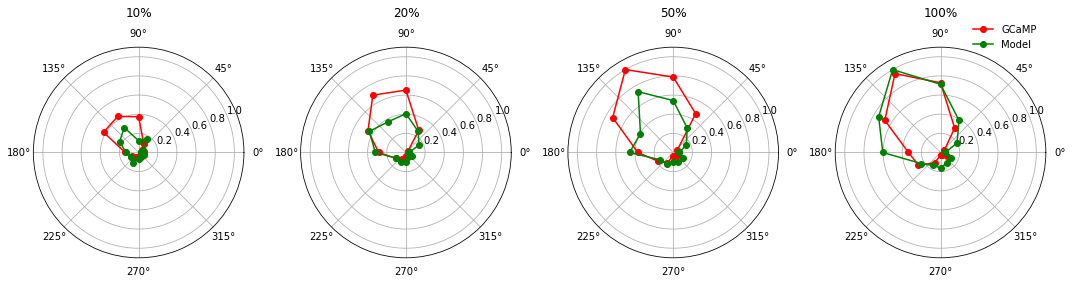

In [25]:
data_list = [T4_gcamp[:,48:96], T4Ca_model[:105,48:96]]
#velocity = [15, 30, 60, 120]
contrast = [10, 20, 50, 100]
peak_tuning = utils.calc_peaktuning(data_list, speed=contrast, contrast=True)
utils.plot_oripeaktuning(data_list,speed=contrast, label=['GCaMP','Model'],contrast=True,fig_size=(15,4), ylim1=(0.0,1.1),ylim2=(0.0,1.1),color=['r','g'],title='Speed_Ori_Tuning');
#plt.savefig('figures/scipymini_wholedatasetfit/OriContrastPolar_model.pdf',dpi=1000)

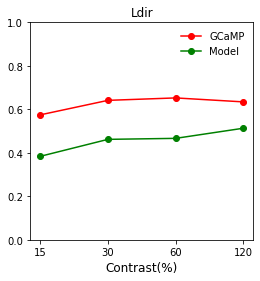

In [26]:
utils.plot_Ldir_mag(peak_tuning, title='',contrast=True,savefig=False);
#plt.savefig('figures/scipymini_wholedatasetfit/OriContrastLdir_model.pdf',dpi=1000)

In [18]:
save_modeldata = True
if save_modeldata:
    np.save('/Volumes/Elements/Project_T4_VoltageCalcium/PaperFigures/data/modeldata/T4Ca_model.npy',T4Ca_model)

In [63]:
save_para = True
if save_para:
    np.save('model_parameters/scipymini_newmodel_alldatasetcombined.npy',model_para)